In [1]:
# General imports
import numpy as np
import sys, os
import healpy as hp

basepath = "../"
sys.path.insert(0, basepath)
import utils.plotting_utils as plots

In [2]:
#  Load the 5BZCat catalog
from lib.data import load_5bzcat, catbins, load_hotspots

cat = load_5bzcat(os.path.join(basepath, "data"))

# Load the hotspot list
hotspot_folder = "data/7yrPS_data"
hotspots = load_hotspots(os.path.join(basepath, hotspot_folder), hemisphere='south')

Load 5bzcat.csv
	Found 3469 sources


In [3]:
# Import stuff for the correlation analysis
from lib.correlation import Correlator, EventSample

In [4]:
# Define that hypothese to test in terms of minimum pValue threshold and association radius
# Here we test the same hypotheses that are tested in Sara Buson et al 2022 ApJL 933 L43
sigmas = np.linspace(0.2, 0.7, 11)
pVal_thrs = np.linspace(3.5, 4.5, 3)

In [5]:
# Initialize the Correlator object and the sample of hotspots to analyse.
# Note that catbins is useless for our analysis but the framework still requires it.
C = Correlator(cat, bins=catbins[-1], dec_range=(np.radians(-85),np.radians(-5)), mlat=np.radians(10))
hs_sample = EventSample(hotspots)
C.add_primary('hotspots', hs_sample, logpVal_thr_list=pVal_thrs, sigma_list=sigmas)

hotspots_mask, counterparts_mask = C.get_counterparts(catbins[-1])

- Setting galactic plane width to 0.2deg.
Catalogue: 3469 sources
Applying cuts to the source catalogue:
	Sources in declination range: [-85.  -5.] degrees: 1214.
	Applying galactic plane cut...
	After galactic plane cut: 1177
	1177 sources above 0.00 (1.00%)
Remove sources that are in no bin: 0.00%
Analysis - Initialize with random seed
Applying cuts to the event sample:
	Events in [-85.  -5.] degrees: 926
	Applying galactic plane cut...
	After galactic plane cut: 774
	Applying the pValue threshold cuts...
-log10(pVal) > 3.5: 44 hotspots will be analysed.
-log10(pVal) > 4.0: 19 hotspots will be analysed.
-log10(pVal) > 4.5: 9 hotspots will be analysed.

hotspots: Lmin = 3.5, sigma = 0.20: 1/44 counterparts above [0]
	R.A.[deg]  -  Dec.[deg]  -  HS logpVal  -  Source Name  -  Offset[deg]  -  Redshift
	44.12         -21.78        4.87          5BZQJ0256-2137   0.17            1.47       

hotspots: Lmin = 3.5, sigma = 0.25: 2/44 counterparts above [0]
	R.A.[deg]  -  Dec.[deg]  -  HS log

In [6]:
C()

(1, 2, 3, 4, 5, 7, 9, 12, 12, 12, 14, 1, 2, 3, 3, 4, 6, 7, 10, 10, 10, 11, 1, 1, 1, 1, 1, 3, 3, 5, 5, 5, 5)

In [7]:
key = "hotspots: Lmin = 4.0, sigma = 0.55"

/Users/chiarabellenghi/.local/share/virtualenvs/blazar_hotspots_correlation-5KT3Yrx_/lib/python3.10/site-packages/healpy/newvisufunc.py:397: UserWarning: 
 *** Overriding default plot properies: {'cbar_shrink': 0.6, 'cbar_pad': 0.05, 'cbar_label_pad': 0, 'cbar_tick_direction': 'out', 'vertical_tick_rotation': 90, 'figure_width': 8.5, 'figure_size_ratio': 0.63} ***
  warnings.warn(
/Users/chiarabellenghi/.local/share/virtualenvs/blazar_hotspots_correlation-5KT3Yrx_/lib/python3.10/site-packages/healpy/newvisufunc.py:401: UserWarning: 
 *** New plot properies: {'cbar_shrink': 0.6, 'cbar_pad': 0.07, 'cbar_label_pad': 5, 'cbar_tick_direction': 'in', 'vertical_tick_rotation': 90, 'figure_width': 8.5, 'figure_size_ratio': 0.63} ***
  warnings.warn("\n *** New plot properies: " + str(plot_properties) + " ***")
/Users/chiarabellenghi/.local/share/virtualenvs/blazar_hotspots_correlation-5KT3Yrx_/lib/python3.10/site-packages/healpy/newvisufunc.py:414: UserWarning: 
 *** Overriding rotated graticu

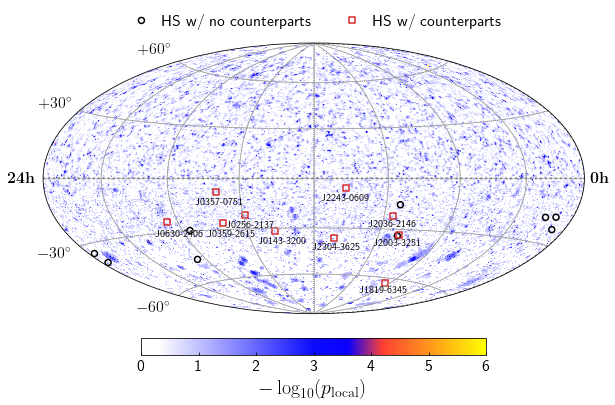

In [8]:
# Load the 7 year skymap and prepare it for plotting
pVals_7yrs = hp.read_map(os.path.join(basepath, "data/7yrPS_data/log10p_maps.fits"))
ax = plots.plot_skymap(pVals_7yrs)

# Plot hotspots with and without counterpart
ra = np.copy(C.primaries[key].events['ra'])
ra[ra<np.pi] = -ra[ra<np.pi]
ra[ra>=np.pi] = 2*np.pi-ra[ra>=np.pi]
ax.scatter(ra[~hotspots_mask[key]], C.primaries[key].events['dec'][~hotspots_mask[key]],
           marker="o", edgecolor="k", facecolor="none", lw=1.5, label="HS w/ no counterparts")
ax.scatter(ra[hotspots_mask[key]], C.primaries[key].events['dec'][hotspots_mask[key]],
           marker="s", edgecolor="tab:red", facecolor="none", lw=1.5, label="HS w/ counterparts")

# Annotate counterpart names
ra = np.copy(C.catalogue[counterparts_mask[key]]['ra'])
ra[ra<np.pi] = -ra[ra<np.pi]
ra[ra>=np.pi] = 2*np.pi-ra[ra>=np.pi]
dec = C.catalogue[counterparts_mask[key]]['dec']
for i in range(len(ra)):
    ax.annotate(
        str(C.catalogue[counterparts_mask[key]]['id'][i])[6:-1],
        (ra[i], dec[i]),
        xytext=(ra[i]-np.radians(15), dec[i]-np.radians(7))
    )
    
ax.legend(frameon=False, loc="lower center", bbox_to_anchor=(0.5,1), fontsize=16,
         ncol=2, handletextpad=.3, columnspacing=1.5)

# plt.savefig("../plots/skymap_with_associations.png",
#            dpi=500, bbox_inches="tight", facecolor="w")